<a href="https://colab.research.google.com/github/Gopisree/day-1/blob/main/bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-03-23,42364.378906,42893.507812,41877.507812,42892.957031,42892.957031,25242943069
2022-03-24,42886.652344,44131.855469,42726.164062,43960.933594,43960.933594,31042992291
2022-03-25,43964.546875,44999.492188,43706.285156,44348.730469,44348.730469,30574413034


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

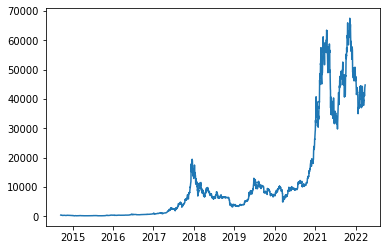

In [9]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [10]:
#train test split
to_row=int(len(df)*0.9)
training_data=list(df[0:to_row]['Adj Close'])
testing_data=list(df[to_row:]['Adj Close'])


In [11]:
testing_data

[32186.27734375,
 34649.64453125,
 34434.3359375,
 35867.77734375,
 35040.8359375,
 33572.1171875,
 33897.046875,
 34668.546875,
 35287.78125,
 33746.00390625,
 34235.1953125,
 33855.328125,
 32877.37109375,
 33798.01171875,
 33520.51953125,
 34240.1875,
 33155.84765625,
 32702.025390625,
 32822.34765625,
 31780.73046875,
 31421.5390625,
 31533.068359375,
 31796.810546875,
 30817.83203125,
 29807.34765625,
 32110.693359375,
 32313.10546875,
 33581.55078125,
 34292.4453125,
 35350.1875,
 37337.53515625,
 39406.94140625,
 39995.90625,
 40008.421875,
 42235.546875,
 41626.1953125,
 39974.89453125,
 39201.9453125,
 38152.98046875,
 39747.50390625,
 40869.5546875,
 42816.5,
 44555.80078125,
 43798.1171875,
 46365.40234375,
 45585.03125,
 45593.63671875,
 44428.2890625,
 47793.3203125,
 47096.9453125,
 47047.00390625,
 46004.484375,
 44695.359375,
 44801.1875,
 46717.578125,
 49339.17578125,
 48905.4921875,
 49321.65234375,
 49546.1484375,
 47706.1171875,
 48960.7890625,
 46942.21875,
 49058

<function matplotlib.pyplot.legend>

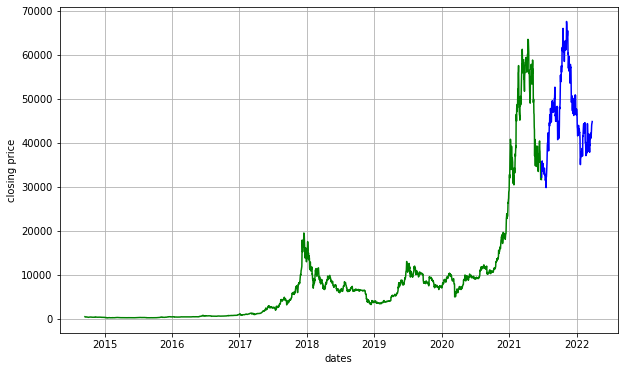

In [12]:
#split data into traing and testing ploting above code graph
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('dates')
plt.ylabel('closing price')
plt.plot(df[0:to_row]['Adj Close'],'green',label='train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label='test data')
plt.legend

In [13]:
model_prediction=[]
n_test_obser=len(testing_data)

In [14]:
for i in range(n_test_obser):
    model=ARIMA(training_data,order=(4,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    print(output)        #for checking o/p and converting this from array to list we use this code
    break

(array([32006.67762962]), array([637.58969751]), array([[30757.0247856 , 33256.33047365]]))


In [15]:
output[0]

array([32006.67762962])

In [16]:
list(output[0])[0]

32006.677629622533

In [17]:
for i in range(n_test_obser):
    model=ARIMA(training_data,order=(4,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output)[0]
    model_prediction.append(yhat)
    actual_test_value=testing_data[i]
    training_data.append(actual_test_value)

In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2747
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22218.989
Method:                       css-mle   S.D. of innovations            788.014
Date:                Sun, 27 Mar 2022   AIC                          44449.978
Time:                        02:39:46   BIC                          44485.488
Sample:                             1   HQIC                         44462.808
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0333     15.306      1.048      0.295     -13.966      46.032
ar.L1.D.y     -0.0239      0.019     -1.256      0.209      -0.061       0.013
ar.L2.D.y     -0.0045      0.019     -0.238      0.812      -0.042       0.033
ar.L3.D.y      0.0094      0.019      0.491      0.624      -0.028       0.047
ar.L4.D.y      0.0369      0.019      1.935      0.053      -0.000       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2639           -0.0000j            2.2639           -0.0000
AR.2           -0.0938           -2.2651j            2.2671           -0.2566
AR.3           -0.0938           +2.2651j            2.2671            0.2566
AR.4           -2.3301           -0.0000j            2.3301           -0.5000
-----------------------------------------------------------------------------
"""

In [19]:
len(model_prediction)

275

In [20]:
len(testing_data)

275

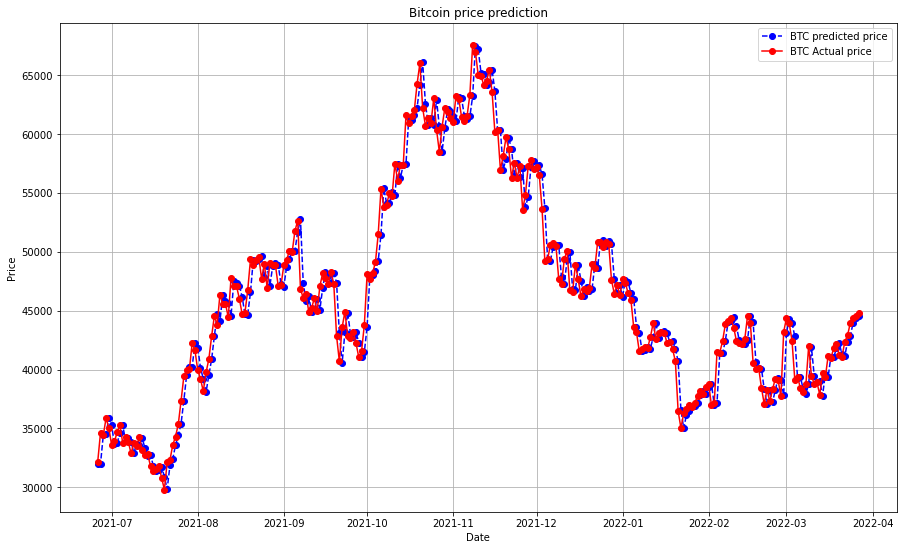

In [21]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range=df[to_row:].index
plt.plot(date_range,model_prediction,color='blue',marker='o',linestyle='dashed',label='BTC predicted price')
plt.plot(date_range,testing_data,color='red',marker='o',label='BTC Actual price')

plt.title('Bitcoin price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
#report performance
mape=np.mean(np.abs(np.array(model_prediction)-np.array(testing_data))/np.abs(testing_data))
print('MAPE:'+str(mape)) #mean absolute % error
#around 3.8% of mape(mean absolute % error)implies the model is about 96.2% accurate in predicting the test set observation

MAPE:0.21762143570847303
